# How to use the data in this dandiset

First let's colllect all the nwb assets in this dandiset.

In [1]:
from dandi.dandiapi import DandiAPIClient


client = DandiAPIClient.for_dandi_instance("dandi")

dandiset_id = "000727"
dandiset = client.get_dandiset(dandiset_id)
asset_list = [asset for asset in dandiset.get_assets() if "nwb" in asset.path]
# The paths are:
[asset.path for asset in asset_list]

['sub-fly-098/sub-fly-098_ses-20200627130208_behavior+image+ophys.nwb',
 'sub-fly-097/sub-fly-097_ses-20200627113329_behavior+image+ophys.nwb',
 'sub-fly-089/sub-fly-089_ses-20200618081653_behavior+image+ophys.nwb',
 'sub-fly-094/sub-fly-094_ses-20200620122048_behavior+image+ophys.nwb',
 'sub-fly-087/sub-fly-087_ses-20200228161226_behavior+image+ophys.nwb',
 'sub-fly-100/sub-fly-100_ses-20200702083849_behavior+image+ophys.nwb',
 'sub-fly-099/sub-fly-099_ses-20200627142647_behavior+image+ophys.nwb',
 'sub-fly-101/sub-fly-101_ses-20200702100612_behavior+image+ophys.nwb',
 'sub-fly-105/sub-fly-105_ses-20200704142706_behavior+image+ophys.nwb']

Now we pick the first of the assets above and stream it

In [2]:
import remfile
from h5py import File
from pynwb import NWBHDF5IO

asset = asset_list[0]
# Here we build the url to download the file
url = f"https://api.dandiarchive.org/api/dandisets/{asset.dandiset_id}/versions/{asset.version_id}/assets/{asset.identifier}/download"


# We stream the file using remfile and open it with h5py and pynwb
file = remfile.File(url)
h5_file = File(file, "r")

io = NWBHDF5IO(file=h5_file)
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x128393678495824
Fields:
  acquisition: {
    TwoPhotonSeriesAnatomicalGreen <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesAnatomicalRed <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesFunctionalGreen <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesFunctionalRed <class 'pynwb.ophys.TwoPhotonSeries'>,
    Video: fictrac-20200627_130208-raw <class 'pynwb.image.ImageSeries'>
  }
  devices: {
    BrukerFluorescenceMicroscope <class 'pynwb.device.Device'>,
    Flea FL3-U3-13E4M-C <class 'pynwb.device.Device'>
  }
  experiment_description: We use volumetric two-photon imaging to map neural activity associated with walking across the entire brain of Drosophila. We detect locomotor signals in approximately 40% of the brain, identify a global signal associated with the transition from rest to walking, and define clustered neural signals selectively associated with changes in forward or angular velocity.
  experimenter: ['Brezovec, Luke' 'Berger, Andrew' 'Druckmann, Saul' 'Clandinin, Thomas']
  file_create_date: [datetime.datetime(2023, 12, 10, 9, 34, 5, 642255, tzinfo=tzoffset(None, 3600))]
  identifier: c93466b0-17dd-4aee-bfe0-2d501a46ec5e
  imaging_planes: {
    ImagingPlaneFunctionalGreenProcessed <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneGCaMP6fAnatomical <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneGCaMP6fFunctional <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlanetdTomatoAnatomical <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlanetdTomatoFunctional <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Stanford
  keywords: <StrDataset for HDF5 dataset "keywords": shape (7,), type "|O">
  lab: Clandinin
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1101/2022.03.20.485047']
  session_description: We use volumetric two-photon imaging to map neural activity associated with walking across the entire brain of Drosophila. We detect locomotor signals in approximately 40% of the brain, identify a global signal associated with the transition from rest to walking, and define clustered neural signals selectively associated with changes in forward or angular velocity.
  session_id: 20200627130208
  session_start_time: 2020-06-27 13:02:18.301376-07:00
  subject: subject pynwb.file.Subject at 0x128393681207760
Fields:
  age: P3D/P4D
  age__reference: birth
  description: Flies were raised on molasses medium at 25 °C with a 12/12-h light/dark cycle. Flies were housed in mixed male/female vials of 10-20 individuals. 3-4 days post-eclosion females were used for imaging.
  genotype: w+/w+;UAS-myr::tdTomato/UAS-GCaMP6f;nSyb-Gal4/+
  sex: F
  species: Drosophila melanogaster
  subject_id: fly_098

  surgery: Each fly was anesthetized on a chilled Peltier plate with a thermally coupled custom holder. Each immobilized fly was carefully fitted into a custom mount consisting of 3D-printed plastic and a custom cut steel shim to tightly nestle the head and thorax. To fix the fly to the mount, UV-curable glue was placed and cured on the dorsal region of the face between the eyes, and on the thorax. A saline solution was added to the dish for dissection (103 mM NaCl, 3 mM KCl, 5 mM TES, 1 mM NaH2PO4, 4 mM MgCl2, 1.5 mM CaCl2, 10 mM trehalose, 10 mM glucose, 7 mM sucrose, and 26 mM NaHCO3). Using a tungsten needle the posterior head cuticle was carefully cut and removed to reveal the whole brain (Figure S1). Dissection forceps were used to remove fat and trachea.
  timestamps_reference_time: 2020-06-27 13:02:18.301376-07:00

## Looking at the anatomical data

In [3]:
two_photon_series_anatomical_red = nwbfile.acquisition["TwoPhotonSeriesAnatomicalRed"]
two_photon_series_anatomical_red

TwoPhotonSeriesAnatomicalRed pynwb.ophys.TwoPhotonSeries at 0x128393678198800
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (100, 1024, 512, 241), type "<u2">
  description: Anatomical imaging data (tdTomato)
  dimension: <HDF5 dataset "dimension": shape (3,), type "<i8">
  field_of_view: <HDF5 dataset "field_of_view": shape (3,), type "<f8">
  imaging_plane: ImagingPlanetdTomatoAnatomical pynwb.ophys.ImagingPlane at 0x128393678557648
Fields:
  conversion: 1.0
  description: The plane or volume being imaged by the microscope.
  device: BrukerFluorescenceMicroscope pynwb.device.Device at 0x128393678496336
Fields:
  description: Bruker Ultima IV, Version 5.5.64.100
  manufacturer: Bruker

  excitation_lambda: 920.0
  imaging_rate: 0.1244341622759608
  indicator: tdTomato
  location: whole brain
  optical_channel: (
    Red <class 'pynwb.ophys.OpticalChannel'>
  )
  unit: meters

  offset: 0.0
  rate: 0.12443416227596198
  resolution: 6.68746528085232e-07
  scan_line_rate: 15831.552283701418
  starting_time: 1884.4038589000702
  starting_time_unit: seconds
  unit: n.a.

In [4]:
two_photon_series_anatomical_red.data.shape

(100, 1024, 512, 241)

We have 100 samples of voxels (first dimension).

The voxel shape 1024 x 512 x 241 where the last dimension is the number of slices / planes.

In [5]:
# Let's visualize the average value of one of the planes
plane_index = 100

mean_plane = two_photon_series_anatomical_red.data[..., plane_index].mean(axis=0)
# Note that taking the mean across the axis=0 is the time average
mean_plane.shape

(1024, 512)

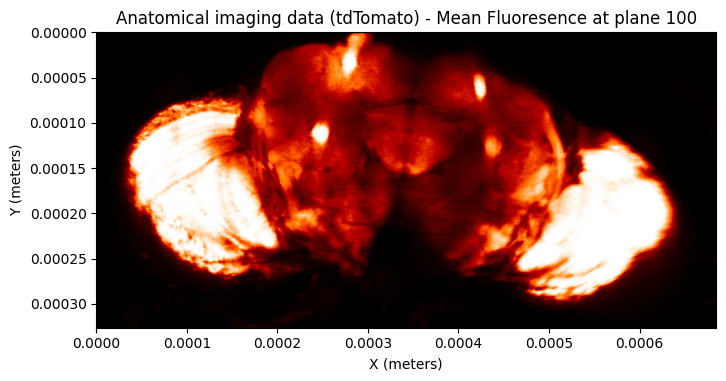

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 6))

# The sizes of the image are stored in the imaging_plane of the TwoPhotonSeriesAnatomicalRed
imaging_plane = two_photon_series_anatomical_red.imaging_plane
grid_spacing_data = imaging_plane.grid_spacing[:]

height, width = mean_plane.shape
x, y = grid_spacing_data[:2]
extent = [0,  height * y, width * x, 0]



img = ax.imshow(mean_plane.T, cmap='gist_heat', extent=extent)

two_photon_series_description = two_photon_series_anatomical_red.description
title = f'{two_photon_series_description} - Mean Fluoresence at plane {plane_index}'
ax.set_title(title)

unit = imaging_plane.origin_coords_unit
ax.set_xlabel(f'X ({unit})')
ax.set_ylabel(f'Y ({unit})')

plt.show()

## Looking at the FicTrac SpatialSeries data

In [7]:
fictrac_container = nwbfile.processing["behavior"]["FicTrac"]
fictrac_container

FicTrac pynwb.behavior.Position at 0x128393678492432
Fields:
  spatial_series: {
    SpatialSeriesAnimalHeading <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesIntegratedMotion <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesMovementDirection <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesMovementSpeed <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesPosition <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesRotationCameraFrame <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesRotationDeltaCameraFrame <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesRotationDeltaError <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesRotationDeltaLabFrame <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesRotationLabFrame <class 'pynwb.behavior.SpatialSeries'>
  }

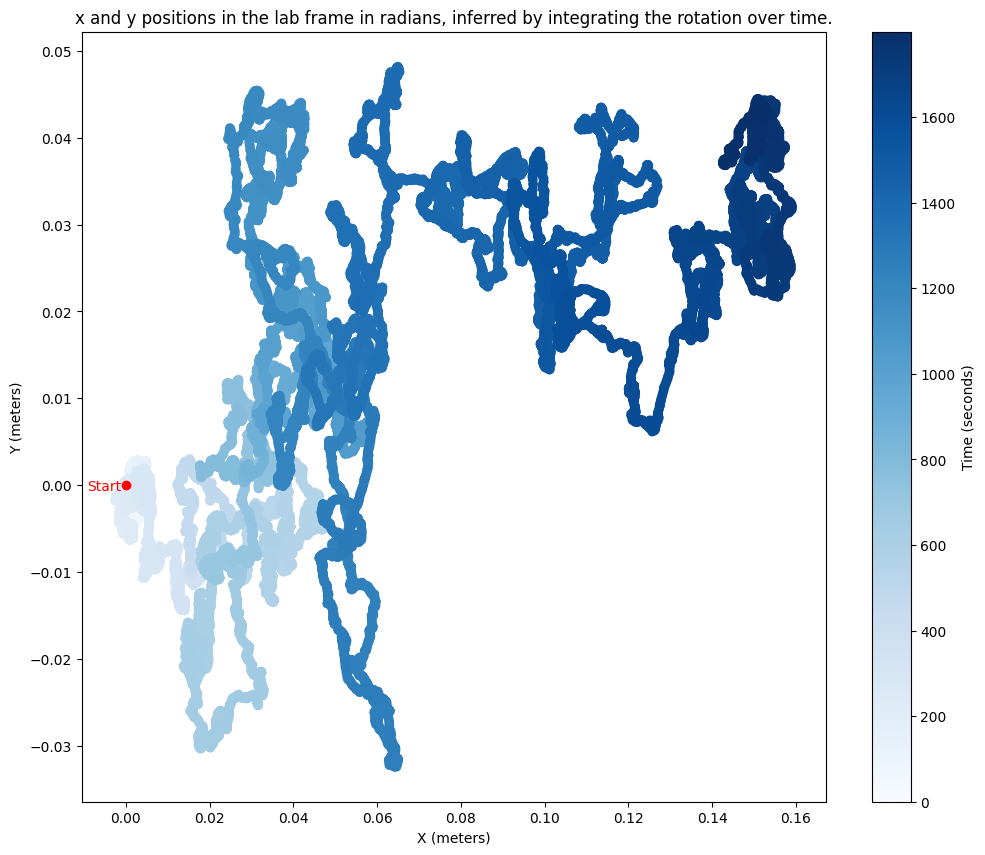

In [8]:
import matplotlib.pyplot as plt


spatial_series = fictrac_container["SpatialSeriesPosition"]
data_in_units = spatial_series.get_data_in_units()
unit = spatial_series.unit
timestamps = spatial_series.get_timestamps()

fig, ax = plt.subplots(figsize=(12, 10))
sc = ax.scatter(data_in_units[:, 0], data_in_units[:, 1], c=timestamps, cmap='Blues')
ax.set_xlabel(f"X ({unit})")  
ax.set_ylabel(f"Y ({unit})") 

plt.colorbar(mappable=sc, ax=ax, label='Time (seconds)')

description = spatial_series.description 
ax.set_title(description)

# Add a annotation at 0, 0 that says start
# Adding a red point at (0, 0)
ax.plot(0, 0, 'ro')  # 'ro' specifies red color and circle marker

# Adding the text annotation "start" near the red point
# You can adjust the 'x' and 'y' arguments in ax.text() to move the text to the desired position
ax.text(-0.001, -0.001, 'Start', color='red', ha='right', va="bottom")
        
plt.show()